<a href="https://colab.research.google.com/github/daivik05/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
repo_name = 'Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'
repo_url = f'https://github.com/daivik05/{repo_name}'
!git clone $repo_url
project_dir = f'/content/{repo_name}'
%cd $project_dir

Cloning into 'Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'...
remote: Enumerating objects: 5109, done.
remote: Counting objects: 100% (367/367), done.
remote: Compressing objects: 100% (363/363), done.
remote: Total 5109 (delta 5), reused 365 (delta 4), pack-reused 4742 (from 1)
Receiving objects: 100% (5109/5109), 1.68 GiB | 28.49 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (5075/5075), done.
/content/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation


In [ ]:
from google.colab import files

# Upload the model file and class indices file
uploaded = files.upload()

Saving plant_disease_cnn_model (1).keras to plant_disease_cnn_model (1).keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted Class: corn_Common_Rust
Percentage of Affected Area: 14.186797968918293 %
Severity Score: Moderate

Treatment Recommendations:
- Resistant Varieties: Use resistant corn hybrids.
- Fungicides: Tebuconazole or Propiconazole. Apply 8-16 ounces per acre.
- Crop Rotation: Rotate with non-host crops.


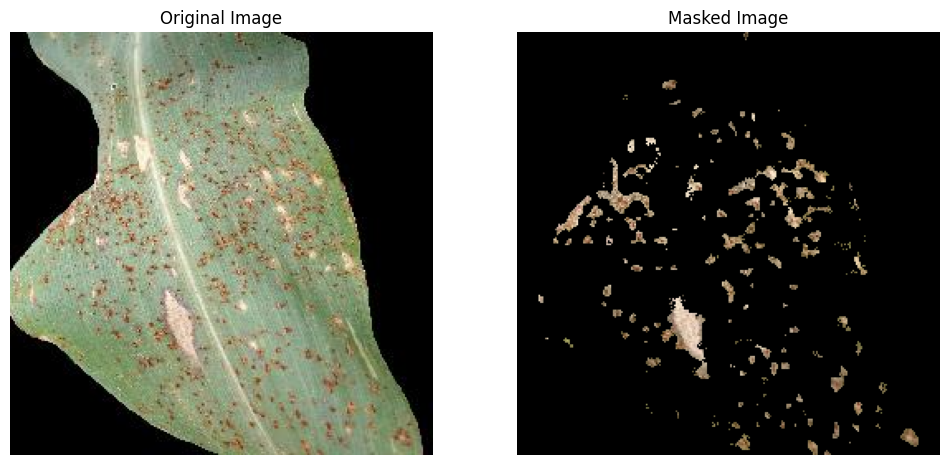

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained classification model
model = load_model('plant_disease_cnn_model (1).keras')

# Define treatment recommendations (same as before)
treatments = {
    'corn_Blight': [
        "Resistant Varieties: Choose hybrid seeds with resistance to blight.",
        "Crop Rotation: Rotate crops annually to break the disease cycle.",
        "Fungicides: Chlorothalonil or Azoxystrobin. Apply 1-2 quarts per acre.",
        "Field Sanitation: Remove and destroy infected residues."
    ],
    'corn_Common_Rust': [
        "Resistant Varieties: Use resistant corn hybrids.",
        "Fungicides: Tebuconazole or Propiconazole. Apply 8-16 ounces per acre.",
        "Crop Rotation: Rotate with non-host crops."
    ],
    'corn_Gray_Leaf_Spot': [
        "Resistant Hybrids: Select hybrids resistant to gray leaf spot.",
        "Fungicides: Pyraclostrobin. Apply 6-12 ounces per acre.",
        "Field Sanitation: Remove infected residues and manage crop debris."
    ],
    'corn_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water based on crop needs.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'rice_Bacterial leaf blight': [
        "Resistant Varieties: Use varieties resistant to bacterial blight.",
        "Proper Fertilization: Balanced fertilizers like N-P-K, 150-200 pounds per acre.",
        "Seed Treatment: Streptomycin, 1-2 grams per liter of water.",
        "Field Sanitation: Remove infected plant debris manually."
    ],
    'rice_Brown spot': [
        "Resistant Varieties: Choose resistant varieties.",
        "Balanced Nutrition: Use 15-15-15 fertilizer, 200-300 pounds per acre.",
        "Fungicides: Carbendazim or Thiophanate-methyl. Apply 0.5-1 pound per acre.",
        "Water Management: Maintain proper water levels."
    ],
    'rice_Leaf smut': [
        "Resistant Varieties: Use resistant or tolerant varieties.",
        "Crop Rotation: Rotate with non-host crops.",
        "Fungicides: Generally not required unless severe. Follow specific product instructions.",
        "Good Agronomic Practices: Follow general crop management practices."
    ],
    'rice_healthy': [
        "Balanced Fertilization: Use a balanced fertilizer like 16-16-16. Apply 50-100 pounds per acre based on soil test results.",
        "Water Management: Maintain proper irrigation by ensuring consistent water depth in fields during critical growth stages.",
        "Weed Control: Use herbicides like Pretilachlor or Butachlor. Apply 0.5-1 liter per acre for effective weed management.",
        "Pest Monitoring: Regularly scout for pest infestations and apply appropriate biological controls or pesticides as needed.",
        "Disease Prevention: Ensure proper crop spacing and aeration to prevent fungal diseases like rice blast or sheath blight."
    ],
    'wheat_leaf_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water as needed.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'wheat_leaf_septoria': [
        "Resistant Varieties: Select resistant varieties.",
        "Crop Rotation and Residue Management: Rotate crops and manage residues.",
        "Fungicides: Epoxiconazole. Apply 8-16 ounces per acre.",
        "Field Monitoring: Regularly scout for early disease signs."
    ],
    'wheat_leaf_stripe_rust': [
        "Resistant Varieties: Use resistant wheat varieties.",
        "Fungicides: Prothioconazole. Apply 8-12 ounces per acre.",
        "Early Detection: Regularly monitor fields for early signs.",
        "Field Hygiene: Remove and destroy infected residues."
    ]
}

# Function to segment disease, ignoring black, white, and gray parts
def segment_disease(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define color ranges for black, white, and gray (to ignore these regions)
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 30])  # Black has low value
    lower_white = np.array([0, 0, 200])  # White has high value and low saturation
    upper_white = np.array([180, 30, 255])
    lower_gray = np.array([0, 0, 40])  # Gray has low saturation, medium value
    upper_gray = np.array([180, 50, 200])

    # Create masks for black, white, and gray
    mask_black = cv2.inRange(hsv, lower_black, upper_black)
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)

    # Combine black, white, and gray masks
    mask_black_white_gray = mask_black | mask_white | mask_gray

    # Define color ranges for disease segmentation (red, yellow, orange, brown)
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    lower_orange = np.array([10, 100, 20])
    upper_orange = np.array([20, 255, 255])
    lower_brown = np.array([10, 40, 40])
    upper_brown = np.array([20, 255, 255])

    # Create masks for each disease color
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)

    # Combine masks for disease regions
    combined_mask = mask_red | mask_yellow | mask_orange | mask_brown

    # Remove black, white, and gray areas from the disease mask
    disease_on_leaf_mask = cv2.bitwise_and(combined_mask, ~mask_black_white_gray)

    return disease_on_leaf_mask, ~mask_black_white_gray  # Return the disease mask and the leaf mask

# Function to calculate percentage of affected area based on the leaf area
def calculate_percentage_affected(disease_mask, leaf_mask):
    total_leaf_pixels = np.count_nonzero(leaf_mask)
    affected_pixels = np.count_nonzero(disease_mask)

    if total_leaf_pixels == 0:
        return 0  # Avoid division by zero if there's no leaf detected

    percentage_affected = (affected_pixels / total_leaf_pixels) * 100
    return percentage_affected

# Function to determine severity based on the percentage affected
def determine_severity(percentage):
    if percentage == 0:
        return "No Disease"
    elif percentage < 10:
        return "Mild"
    elif percentage < 25:
        return "Moderate"
    elif percentage < 50:
        return "Severe"
    else:
        return "Critical"

# Main function to predict disease and calculate affected area
def segment_predict_and_calculate_percentage(img_path, model, class_labels):
    img = cv2.imread(img_path)
    disease_mask, leaf_mask = segment_disease(img)
    percentage_affected = calculate_percentage_affected(disease_mask, leaf_mask)

    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    severity_score = determine_severity(percentage_affected)

    return predicted_class, percentage_affected, severity_score, disease_mask


# Function to get treatment recommendation
def get_treatment_recommendation(disease):
    return treatments.get(disease, ["No treatment information available."])

# Path to test image
img_path = 'train/corn_Common_Rust/Corn_Common_Rust (1001).JPG'
class_labels = ['corn_Blight', 'corn_Common_Rust', 'corn_Gray_Leaf_Spot', 'corn_Healthy',
                 'rice_Bacterial leaf blight', 'rice_Brown spot', 'rice_Leaf smut', 'rice_healthy',
                 'wheat_leaf_Healthy', 'wheat_leaf_septoria', 'wheat_leaf_stripe_rust']

# Make prediction and calculate percentage affected
predicted_class, percentage_affected, severity_score, disease_mask = segment_predict_and_calculate_percentage(img_path, model, class_labels)
print("Predicted Class:", predicted_class)
print("Percentage of Affected Area:", percentage_affected, "%")
print("Severity Score:", severity_score)

treatment_recommendation = get_treatment_recommendation(predicted_class)
print("\nTreatment Recommendations:")
for treatment in treatment_recommendation:
    print("-", treatment)

# Show results based on prediction
if predicted_class.lower().endswith("healthy"):
    print("The plant is healthy.")
    # Show original image only (no percentage for healthy plants)
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Healthy Plant')
    plt.axis('off')
    plt.show()
else:
    # Show original and masked images only if the plant has a disease
    img = cv2.imread(img_path)
    masked_img = cv2.bitwise_and(img, img, mask=disease_mask)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    plt.title('Masked Image')
    plt.axis('off')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Predicted Class: wheat_leaf_stripe_rust
Percentage of Affected Area: 6.2881533438546615 %
Severity Score: Mild
Intensity Severity: Severe
Intensity Percentage: 47.93562156599254 %

Treatment Recommendations:
- Resistant Varieties: Use resistant wheat varieties.
- Fungicides: Prothioconazole. Apply 8-12 ounces per acre.
- Early Detection: Regularly monitor fields for early signs.
- Field Hygiene: Remove and destroy infected residues.


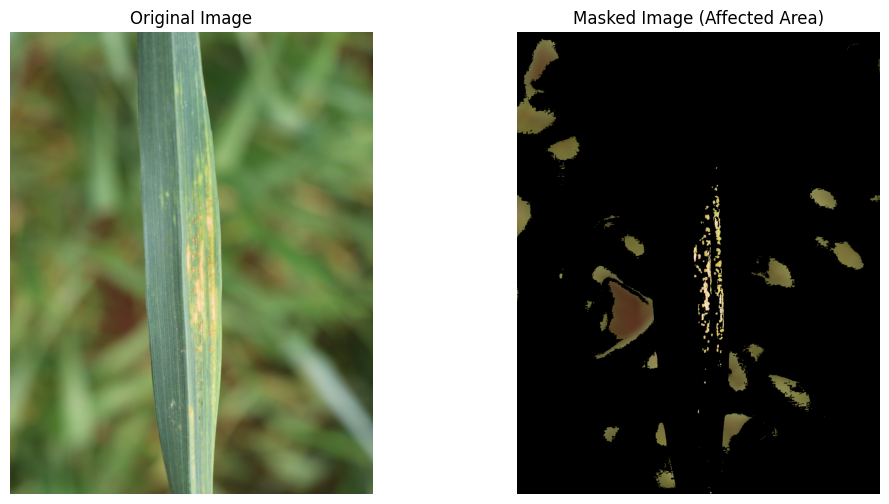

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained classification model
model = load_model('plant_disease_cnn_model (1).keras')

# Define treatment recommendations
treatments = {
    'corn_Blight': [
        "Resistant Varieties: Choose hybrid seeds with resistance to blight.",
        "Crop Rotation: Rotate crops annually to break the disease cycle.",
        "Fungicides: Chlorothalonil or Azoxystrobin. Apply 1-2 quarts per acre.",
        "Field Sanitation: Remove and destroy infected residues."
    ],
    'corn_Common_Rust': [
        "Resistant Varieties: Use resistant corn hybrids.",
        "Fungicides: Tebuconazole or Propiconazole. Apply 8-16 ounces per acre.",
        "Crop Rotation: Rotate with non-host crops."
    ],
    'corn_Gray_Leaf_Spot': [
        "Resistant Hybrids: Select hybrids resistant to gray leaf spot.",
        "Fungicides: Pyraclostrobin. Apply 6-12 ounces per acre.",
        "Field Sanitation: Remove infected residues and manage crop debris."
    ],
    'corn_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water based on crop needs.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'rice_Bacterial leaf blight': [
        "Resistant Varieties: Use varieties resistant to bacterial blight.",
        "Proper Fertilization: Balanced fertilizers like N-P-K, 150-200 pounds per acre.",
        "Seed Treatment: Streptomycin, 1-2 grams per liter of water.",
        "Field Sanitation: Remove infected plant debris manually."
    ],
    'rice_Brown spot': [
        "Resistant Varieties: Choose resistant varieties.",
        "Balanced Nutrition: Use 15-15-15 fertilizer, 200-300 pounds per acre.",
        "Fungicides: Carbendazim or Thiophanate-methyl. Apply 0.5-1 pound per acre.",
        "Water Management: Maintain proper water levels."
    ],
    'rice_Leaf smut': [
        "Resistant Varieties: Use resistant or tolerant varieties.",
        "Crop Rotation: Rotate with non-host crops.",
        "Fungicides: Generally not required unless severe. Follow specific product instructions.",
        "Good Agronomic Practices: Follow general crop management practices."
    ],
    'rice_healthy': [
        "Balanced Fertilization: Use a balanced fertilizer like 16-16-16. Apply 50-100 pounds per acre based on soil test results.",
        "Water Management: Maintain proper irrigation by ensuring consistent water depth in fields during critical growth stages.",
        "Weed Control: Use herbicides like Pretilachlor or Butachlor. Apply 0.5-1 liter per acre for effective weed management.",
        "Pest Monitoring: Regularly scout for pest infestations and apply appropriate biological controls or pesticides as needed.",
        "Disease Prevention: Ensure proper crop spacing and aeration to prevent fungal diseases like rice blast or sheath blight."
    ],
    'wheat_leaf_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water as needed.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'wheat_leaf_septoria': [
        "Resistant Varieties: Select resistant varieties.",
        "Crop Rotation and Residue Management: Rotate crops and manage residues.",
        "Fungicides: Epoxiconazole. Apply 8-16 ounces per acre.",
        "Field Monitoring: Regularly scout for early disease signs."
    ],
    'wheat_leaf_stripe_rust': [
        "Resistant Varieties: Use resistant wheat varieties.",
        "Fungicides: Prothioconazole. Apply 8-12 ounces per acre.",
        "Early Detection: Regularly monitor fields for early signs.",
        "Field Hygiene: Remove and destroy infected residues."
    ]
}

# Function to segment disease, ignoring black, white, and gray parts
def segment_disease(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 30])
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([180, 30, 255])
    lower_gray = np.array([0, 0, 40])
    upper_gray = np.array([180, 50, 200])

    mask_black = cv2.inRange(hsv, lower_black, upper_black)
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)

    mask_black_white_gray = mask_black | mask_white | mask_gray

    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    lower_orange = np.array([10, 100, 20])
    upper_orange = np.array([20, 255, 255])
    lower_brown = np.array([10, 40, 40])
    upper_brown = np.array([20, 255, 255])

    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)

    combined_mask = mask_red | mask_yellow | mask_orange | mask_brown

    disease_on_leaf_mask = cv2.bitwise_and(combined_mask, ~mask_black_white_gray)

    return disease_on_leaf_mask, ~mask_black_white_gray

# Function to calculate percentage of affected area
def calculate_percentage_affected(disease_mask, leaf_mask):
    total_leaf_pixels = np.count_nonzero(leaf_mask)
    affected_pixels = np.count_nonzero(disease_mask)

    if total_leaf_pixels == 0:
        return 0

    percentage_affected = (affected_pixels / total_leaf_pixels) * 100
    return percentage_affected

def determine_severity(percentage):
    if percentage == 0:
        return "No Disease"
    elif percentage < 10:
        return "Mild"
    elif percentage < 25:
        return "Moderate"
    elif percentage < 50:
        return "Severe"
    else:
        return "Critical"

# Function to determine severity based on intensity of the disease
def determine_severity_based_on_intensity(disease_mask, img):
    # Convert the image to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Extract the Value (intensity) channel
    value_channel = hsv_img[:, :, 2]

    # Mask the intensity values using the disease mask
    diseased_intensity_values = value_channel[disease_mask > 0]

    if len(diseased_intensity_values) == 0:
        return "No disease detected", 0.0

    # Calculate the average intensity in the diseased area
    avg_intensity = np.mean(diseased_intensity_values)

    # Convert intensity to percentage (0-255 -> 0-100%)
    intensity_percentage = (avg_intensity / 255.0) * 100

    # Determine severity based on the percentage of intensity value
    if intensity_percentage > 78.4:  # 200/255 * 100 ≈ 78.4
        severity = "Mild"
    elif intensity_percentage > 58.8:  # 150/255 * 100 ≈ 58.8
        severity = "Moderate"
    else:
        severity = "Severe"

    return severity, intensity_percentage

# Main function to predict disease and calculate affected area and intensity
def segment_predict_and_calculate_percentage(img_path, model, class_labels):
    img = cv2.imread(img_path)
    disease_mask, leaf_mask = segment_disease(img)
    percentage_affected = calculate_percentage_affected(disease_mask, leaf_mask)

    img_resized = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    # Determine severity based on percentage of affected area and intensity
    severity_score = determine_severity(percentage_affected)
    intensity_severity, intensity_percentage = determine_severity_based_on_intensity(disease_mask, img)

    return predicted_class, percentage_affected, severity_score, intensity_severity, intensity_percentage, disease_mask

# Function to get treatment recommendation
def get_treatment_recommendation(disease):
    return treatments.get(disease, ["No treatment information available."])

# Path to test image
img_path = 'train/wheat_leaf_stripe_rust/lolr(94).JPG'
class_labels = ['corn_Blight', 'corn_Common_Rust', 'corn_Gray_Leaf_Spot', 'corn_Healthy',
                'rice_Bacterial leaf blight', 'rice_Brown spot', 'rice_Leaf smut', 'rice_healthy',
                'wheat_leaf_Healthy', 'wheat_leaf_septoria', 'wheat_leaf_stripe_rust']

# Make prediction and calculate percentage affected and intensity severity
predicted_class, percentage_affected, severity_score, intensity_severity, intensity_percentage, disease_mask = segment_predict_and_calculate_percentage(img_path, model, class_labels)


# Show results
print("Predicted Class:", predicted_class)
if predicted_class.lower().endswith("healthy"):
    print("The plant is healthy.")


    # Print only treatment recommendations for a healthy plant
    treatment_recommendation = get_treatment_recommendation(predicted_class)
    print("\nTreatment Recommendations:")
    for treatment in treatment_recommendation:
        print("-", treatment)

else:
    # If the plant is diseased, show severity and affected area percentage
    severity_score = determine_severity(percentage_affected)
    print("Percentage of Affected Area:", percentage_affected, "%")
    print("Severity Score:", severity_score)
    print("Intensity Severity:", intensity_severity)
    print("Intensity Percentage:", intensity_percentage, "%")

    # Get treatment recommendations
    treatment_recommendation = get_treatment_recommendation(predicted_class)
    print("\nTreatment Recommendations:")
    for treatment in treatment_recommendation:
        print("-", treatment)

# Show images based on the prediction
if predicted_class.lower().endswith("healthy"):
    print("The plant is healthy.")
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Healthy Plant')
    plt.axis('off')
    plt.show()
else:
    img = cv2.imread(img_path)
    masked_img = cv2.bitwise_and(img, img, mask=disease_mask)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    plt.title('Masked Image (Affected Area)')
    plt.axis('off')

    plt.show()


In [ ]:
!pip install flask flask-ngrok
!pip install pyngrok

In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import base64
import json

app = Flask(__name__)

# Load the trained classification model
model = load_model('plant_disease_cnn_model (1).keras')

# Define treatment recommendations
treatments = {
    'corn_Blight': [
        "Resistant Varieties: Choose hybrid seeds with resistance to blight.",
        "Crop Rotation: Rotate crops annually to break the disease cycle.",
        "Fungicides: Chlorothalonil or Azoxystrobin. Apply 1-2 quarts per acre.",
        "Field Sanitation: Remove and destroy infected residues."
    ],
    'corn_Common_Rust': [
        "Resistant Varieties: Use resistant corn hybrids.",
        "Fungicides: Tebuconazole or Propiconazole. Apply 8-16 ounces per acre.",
        "Crop Rotation: Rotate with non-host crops."
    ],
    'corn_Gray_Leaf_Spot': [
        "Resistant Hybrids: Select hybrids resistant to gray leaf spot.",
        "Fungicides: Pyraclostrobin. Apply 6-12 ounces per acre.",
        "Field Sanitation: Remove infected residues and manage crop debris."
    ],
    'corn_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water based on crop needs.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'rice_Bacterial leaf blight': [
        "Resistant Varieties: Use varieties resistant to bacterial blight.",
        "Proper Fertilization: Balanced fertilizers like N-P-K, 150-200 pounds per acre.",
        "Seed Treatment: Streptomycin, 1-2 grams per liter of water.",
        "Field Sanitation: Remove infected plant debris manually."
    ],
    'rice_Brown spot': [
        "Resistant Varieties: Choose resistant varieties.",
        "Balanced Nutrition: Use 15-15-15 fertilizer, 200-300 pounds per acre.",
        "Fungicides: Carbendazim or Thiophanate-methyl. Apply 0.5-1 pound per acre.",
        "Water Management: Maintain proper water levels."
    ],
    'rice_Leaf smut': [
        "Resistant Varieties: Use resistant or tolerant varieties.",
        "Crop Rotation: Rotate with non-host crops.",
        "Fungicides: Generally not required unless severe. Follow specific product instructions.",
        "Good Agronomic Practices: Follow general crop management practices."
    ],
    'wheat_leaf_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water as needed.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'wheat_leaf_septoria': [
        "Resistant Varieties: Select resistant varieties.",
        "Crop Rotation and Residue Management: Rotate crops and manage residues.",
        "Fungicides: Epoxiconazole. Apply 8-16 ounces per acre.",
        "Field Monitoring: Regularly scout for early disease signs."
    ],
    'wheat_leaf_stripe_rust': [
        "Resistant Varieties: Use resistant wheat varieties.",
        "Fungicides: Prothioconazole. Apply 8-12 ounces per acre.",
        "Early Detection: Regularly monitor fields for early signs.",
        "Field Hygiene: Remove and destroy infected residues."
    ]
}

def segment_disease(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define color ranges for segmentation
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    lower_orange = np.array([10, 100, 20])
    upper_orange = np.array([20, 255, 255])
    lower_brown = np.array([10, 40, 40])
    upper_brown = np.array([20, 255, 255])

    # Create masks for each color
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)

    # Combine masks
    combined_mask = mask_red | mask_yellow | mask_orange | mask_brown

    return combined_mask

def calculate_percentage_affected(mask):
    total_pixels = mask.size
    affected_pixels = np.count_nonzero(mask)
    percentage_affected = (affected_pixels / total_pixels) * 100
    return percentage_affected

def segment_predict_and_calculate_percentage(img_path, model, class_labels):
    img = cv2.imread(img_path)
    disease_mask = segment_disease(img)
    percentage_affected = calculate_percentage_affected(disease_mask)

    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    return predicted_class, percentage_affected, disease_mask

def get_treatment_recommendation(disease):
    return treatments.get(disease, ["No treatment information available."])

def image_to_base64(img):
    _, buffer = cv2.imencode('.png', img)
    img_base64 = base64.b64encode(buffer).decode('utf-8')
    return img_base64

@app.route('/upload', methods=['POST'])
def upload_image():
    file = request.files['file']
    file.save('uploaded_image.png')
    img_path = 'uploaded_image.png'

    class_labels = ['corn_Blight', 'corn_Common_Rust', 'corn_Gray_Leaf_Spot', 'corn_Healthy',
                    'rice_Bacterial leaf blight', 'rice_Brown spot', 'rice_Leaf smut',
                    'wheat_leaf_Healthy', 'wheat_leaf_septoria', 'wheat_leaf_stripe_rust']

    predicted_class, percentage_affected, disease_mask = segment_predict_and_calculate_percentage(img_path, model, class_labels)

    treatment_recommendation = get_treatment_recommendation(predicted_class)

    original_img = cv2.imread(img_path)
    masked_img = cv2.bitwise_and(original_img, original_img, mask=disease_mask)

    original_img_base64 = image_to_base64(original_img)
    masked_img_base64 = image_to_base64(masked_img)

    response = {
        "predicted_class": predicted_class,
        "percentage_affected": percentage_affected,
        "treatment_recommendation": treatment_recommendation,
        "original_image": original_img_base64,
        "masked_image": masked_img_base64
    }

    return jsonify(response)

if __name__ == '__main__':
    ngrok.set_auth_token("2j0vyEGckvMBGp1AQ6uhDpHp90D_2wDscsJ7TUU6f3v7RvC4o")
    public_url = ngrok.connect(5000)
    print(" * ngrok tunnel URL:", public_url.public_url)
    app.run()


 * ngrok tunnel URL: https://cf26-34-138-147-251.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [03/Oct/2024 06:58:42] "POST / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [03/Oct/2024 07:00:35] "POST / HTTP/1.1" 404 -
